In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
images_path = "/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images"
masks_path = "/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks"

file_names = os.listdir(images_path)
file_names[:5]

['653_00120.png',
 '229_00180.png',
 '298_00330.png',
 '7_00240.png',
 '456_00180.png']

In [4]:
def load_image(image_path, mask_path):
    image, mask = tf.io.read_file(image_path), tf.io.read_file(mask_path)
    image, mask = tf.image.decode_png(image), tf.image.decode_png(mask)
    image, mask = tf.cast(image, tf.float32), tf.cast(mask, tf.float32)
    image, mask = tf.image.resize(image, (224,224)), tf.image.resize(mask, (224,224))
    image, mask = image/255, mask/255
    return image, mask


In [5]:
image, mask = load_image(os.path.join(images_path, file_names[0]), os.path.join(masks_path, file_names[0]))
image, mask

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.5372549 , 0.44705883, 0.4509804 ],
         [0.53333336, 0.44313726, 0.44705883],
         [0.5254902 , 0.43529412, 0.43508402],
         ...,
         [0.42188314, 0.3647059 , 0.3512949 ],
         [0.41052666, 0.35954624, 0.3330053 ],
         [0.40644258, 0.3554622 , 0.3280112 ]],
 
        [[0.55266106, 0.45462185, 0.4512605 ],
         [0.5487395 , 0.45070028, 0.44733894],
         [0.54682124, 0.44878203, 0.44512552],
         ...,
         [0.42787033, 0.37069306, 0.3572821 ],
         [0.41890523, 0.36792484, 0.34138387],
         [0.41932774, 0.36834735, 0.34089637]],
 
        [[0.5589686 , 0.4687725 , 0.46485093],
         [0.5544268 , 0.4642307 , 0.46030912],
         [0.55131805, 0.46112195, 0.45720038],
         ...,
         [0.43569183, 0.37294674, 0.35726047],
         [0.42920133, 0.3768559 , 0.35076997],
         [0.42829132, 0.37731093, 0.34985995]],
 
        ...,
 
        [[0.32230717, 0.21250325

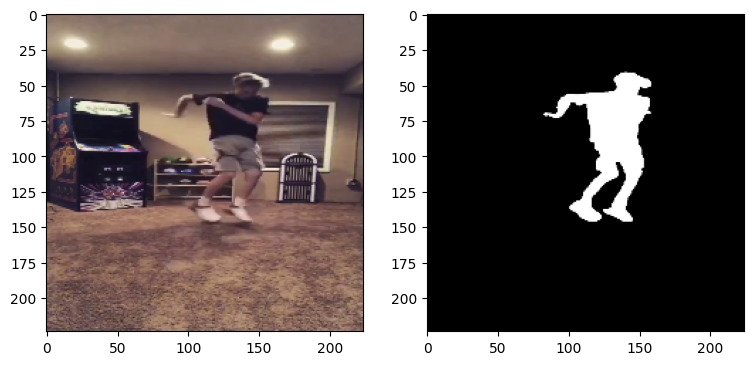

In [6]:
fig, axes = plt.subplots(1,2,figsize=(9,9))
axes[0].imshow(image)
axes[1].imshow(mask)

In [7]:
import keras
from keras.layers import Conv2D, Input, BatchNormalization, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from keras.models import Model

In [8]:

inputs = Input((224,224,3))

c1 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same") (inputs)
c1 = BatchNormalization()(c1)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same") (c1)
c1 = BatchNormalization()(c1)
c1 = Dropout(0.1)(c1)
p1 = MaxPooling2D((2,2))(c1)

c2 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same") (p1)
c2 = BatchNormalization()(c2)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
c2 = BatchNormalization()(c2)
p2 = MaxPooling2D((2,2))(c2)

c3 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same") (p2)
c3 = BatchNormalization()(c3)
c3 = Dropout(0.1)(c3)
c3 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
c3 = BatchNormalization()(c3)
p3 = MaxPooling2D((2,2))(c3)

c4 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same") (p3)
c4 = BatchNormalization()(c4)
c4 = Dropout(0.1)(c4)
c4 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
c4 = BatchNormalization()(c4)
p4 = MaxPooling2D((2,2))(c4)

c5 = Conv2D(512, (3,3), activation="relu", kernel_initializer="he_normal", padding="same") (p4)
c5 = BatchNormalization()(c5)
c5 = Dropout(0.1)(c5)
c5 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)
c5 = BatchNormalization()(c5)

u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
c6 = BatchNormalization()(c6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)
c6 = BatchNormalization()(c6)

u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
c7 = BatchNormalization()(c7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)
c7 = BatchNormalization()(c7)

u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
c8 = BatchNormalization()(c8)
c8 = Dropout(0.2)(c8)
c8 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)
c8 = BatchNormalization()(c8)

u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
c9 = BatchNormalization()(c9)
c9 = Dropout(0.2)(c9)
c9 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)
c9 = BatchNormalization()(c9)

outputs=Conv2D(1, (1,1), activation="sigmoid")(c9)







In [9]:
unet_model = Model(inputs=[inputs], outputs=[outputs])
unet_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
unet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 32)         896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 224, 224, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 224, 224, 32)         0         ['batch_normalization[0][0

In [10]:
images = np.array([os.path.join(images_path, x) for x in file_names])
masks = np.array([os.path.join(masks_path, x) for x in file_names])
print(images.shape, masks.shape)


(2615,) (2615,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images, masks, test_size=0.2)


In [12]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2092,) (2092,)
(523,) (523,)


In [13]:
training_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
training_dataset = training_dataset.map(load_image).shuffle(1000).batch(8)


In [14]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
test_dataset = test_dataset.map(load_image).batch(1)

In [15]:
loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [16]:
@tf.function
def train_step(x,y):
    loss_ = 0
    with tf.GradientTape(persistent=True) as tape:
        pred = unet_model(x, training=True)
        loss_ = loss(pred,y)
    gradients = tape.gradient(loss_, unet_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, unet_model.trainable_variables))
    return loss_
    
    

In [17]:
epochs = 20
losses = []
for epoch in range(epochs):
    batch_loss = []
    for train_x, train_y in training_dataset:
        loss_ = train_step(train_x, train_y)
        batch_loss.append(loss_)
    val_losses = []
    for x,y in test_dataset:
        val_losses.append(loss(unet_model(x, training=False), y))
    losses.append(np.mean(batch_loss))
    print(f"Completed epoch: {epoch} Training loss: {np.mean(batch_loss)} Validation loss: {np.mean(val_losses)}")

2023-12-28 12:17:04.883178: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-12-28 12:18:13.663465: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Completed epoch: 0 Training loss: 1.7285363674163818 Validation loss: 1.2913528680801392
Completed epoch: 1 Training loss: 0.6896241307258606 Validation loss: 0.7379881143569946
Completed epoch: 2 Training loss: 0.5290381908416748 Validation loss: 0.5234736204147339
Completed epoch: 3 Training loss: 0.4372296929359436 Validation loss: 0.4636055529117584
Completed epoch: 4 Training loss: 0.3783396780490875 Validation loss: 0.35348597168922424
Completed epoch: 5 Training loss: 0.32984423637390137 Validation loss: 0.40248414874076843
Completed epoch: 6 Training loss: 0.2910987436771393 Validation loss: 0.2984815835952759
Completed epoch: 7 Training loss: 0.26720598340034485 Validation loss: 0.3328320384025574
Completed epoch: 8 Training loss: 0.23085184395313263 Validation loss: 0.26837432384490967
Completed epoch: 9 Training loss: 0.2386244535446167 Validation loss: 0.43259891867637634
Completed epoch: 10 Training loss: 0.21402233839035034 Validation loss: 0.25572872161865234
Completed e

In [18]:
x,y = next(iter(test_dataset))
x.shape, y.shape

(TensorShape([1, 224, 224, 3]), TensorShape([1, 224, 224, 3]))

In [19]:
pred = unet_model(x)
pred.shape

TensorShape([1, 224, 224, 1])

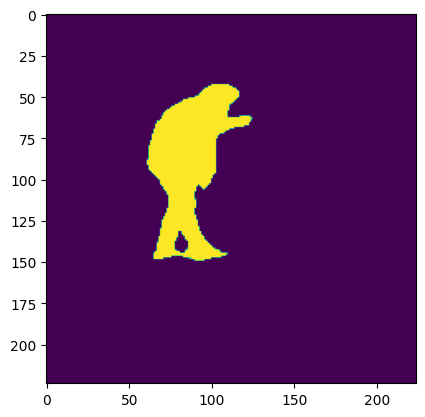

In [20]:
plt.imshow(pred[0])

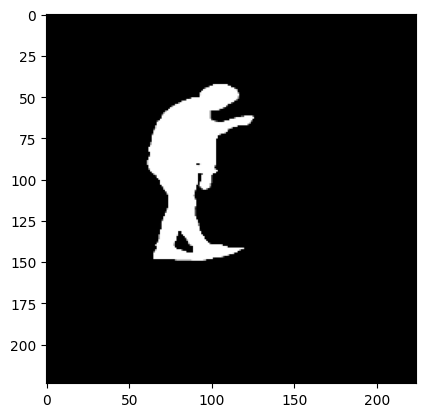

In [21]:
plt.imshow(y[0])

In [22]:
unet_model.save("/kaggle/working/model")